In [1]:
%pylab inline
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ~/project/FLASH4.3_3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object


#### All plots are projected onto a level 7 Fixed Resolution Buffer because level 8 was too much to handle (-->$2048^3 cells$)

In [11]:
cd ~/project/FLASH4.3_3/lev8nosink/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/lev8nosink


In [5]:
import yt
from yt.mods import *
yt.funcs.mylog.setLevel(50) #coerce output null
def plot_dens(i,velocity=False,grid=False,zmin ="",zmax="",particle=False):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    if zmin!="" and zmax!="": slc.set_zlim(physical_quantity,zmin,zmax)
    if particle : 
        data =np.loadtxt("sinks_evol.dat_cleaned",skiprows=1)
        pcl_indx_at_t = np.where(np.isclose(int(ds.current_time.in_cgs()),data[:,1]))[0]
        print "Number of sink particles: " , len(pcl_indx_at_t)
        pcl_pos_at_t = data[pcl_indx_at_t,2:5]
        for pos in pcl_pos_at_t:
            slc.annotate_marker(pos, coord_system='data',marker='.',plot_args={'color':'black','s':3})
    slc.show()


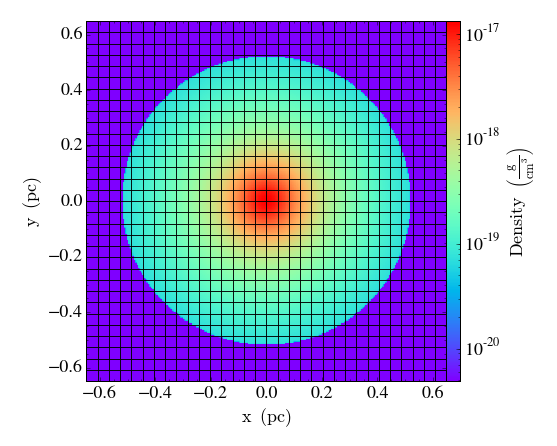


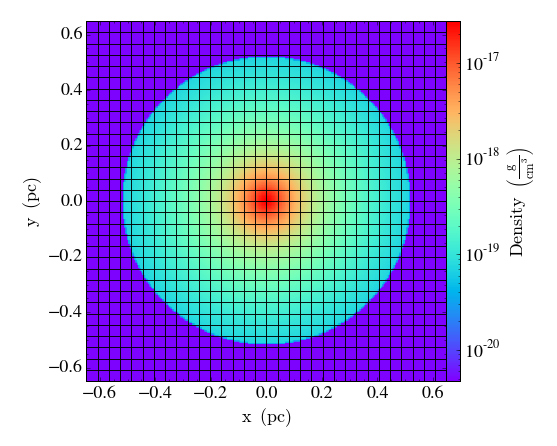


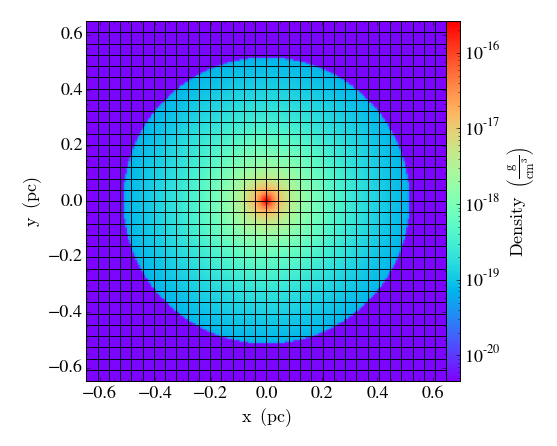


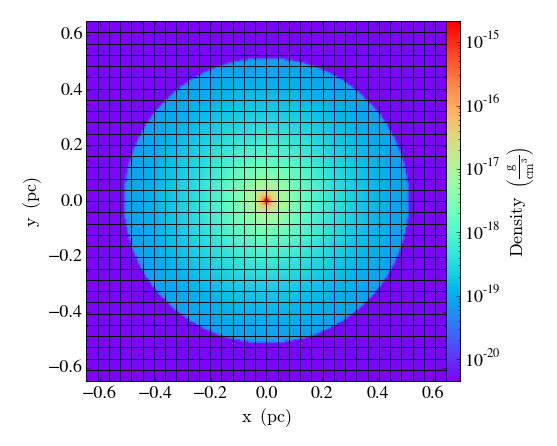


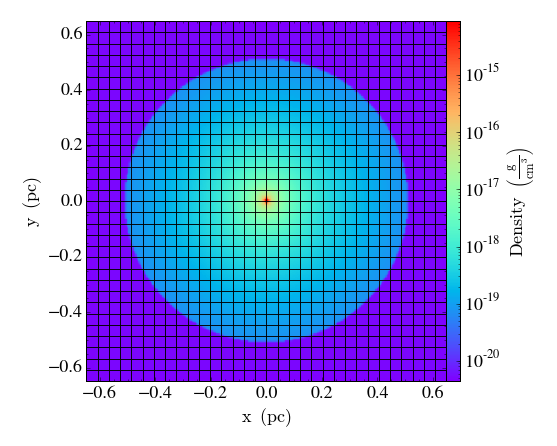


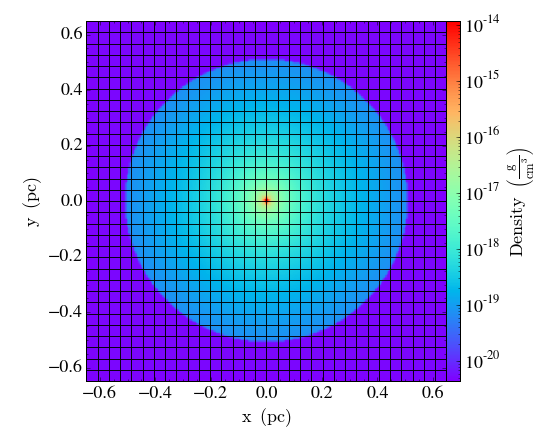

In [13]:
for i in [10,20,30,35,40,43]:
    plot_dens(i,grid=True)

Not sure why this is unigrid, checked sod.log and 

``
lrefine_max                 =          8 [CHANGED]
lrefine_min                 =          6 [CHANGED]
``

is the same and it looks like refinement is actually happening, might be just a yt thing? 

In [7]:
cd ~/project/FLASH4.3_3/lev8sink/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/lev8sink



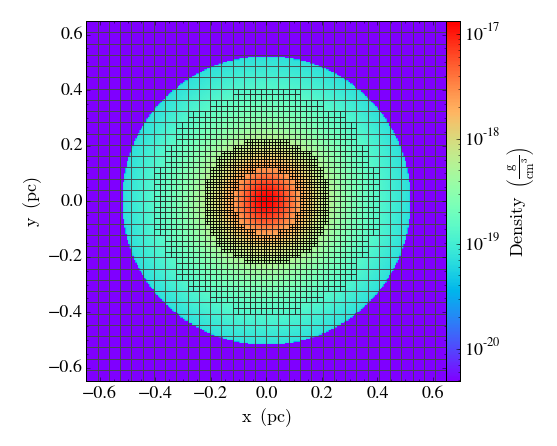


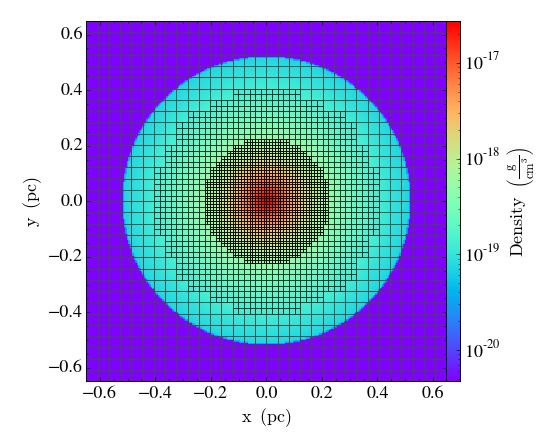


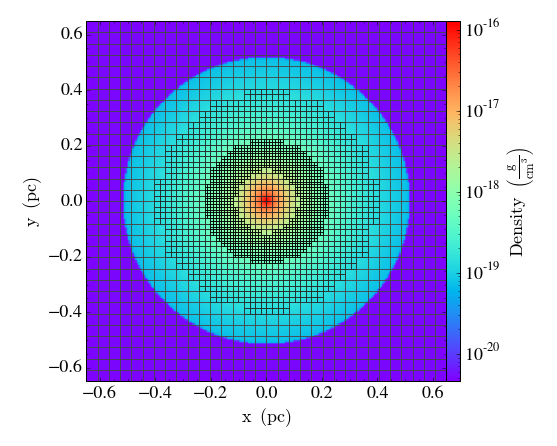


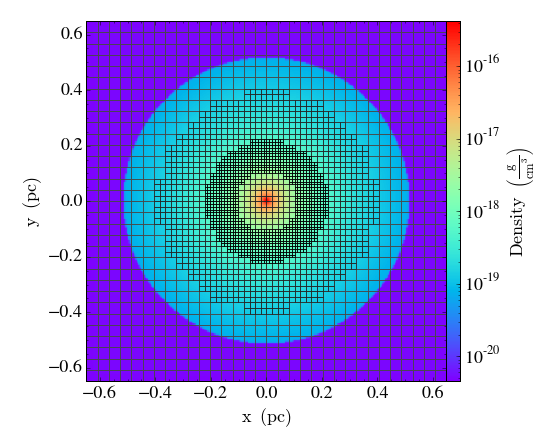


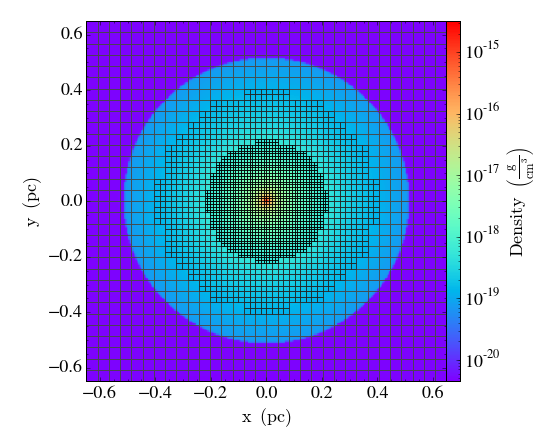


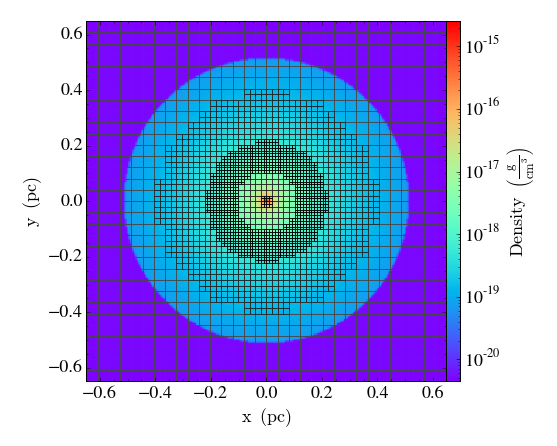


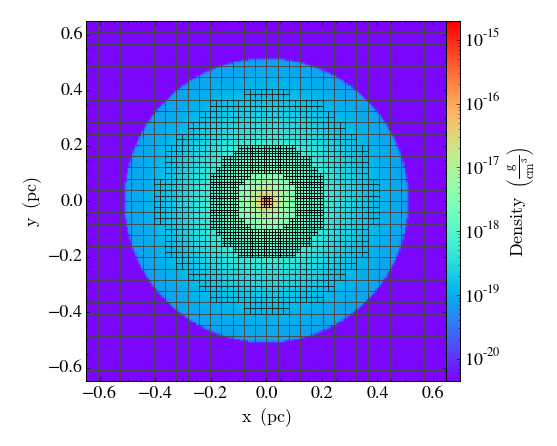

In [10]:
for i in [10,20,30,35,40,45,51]:
    plot_dens(i,grid=True)

(0.05, 100)

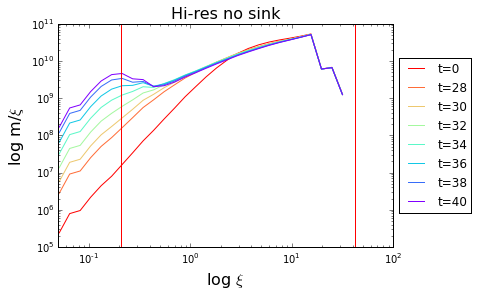

In [3]:
G = 6.67e-8 #cgs
c_s = 28730.5 #cm/s

xi_range = np.logspace(-1.5,1.5,num=30)
tlst = [0,28,30,32,34,36,38,40]
hsv = plt.get_cmap('rainbow_r')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("2fast_sum_args_list{}_lev7.txt".format(s))
    plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
    
min_cell_size =  1e19/2**(9)*1.057E-17
plt.axvline(min_cell_size,c="red")
plt.axvline(4e18*1.057E-17,c="red")
plt.legend(loc ="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Hi-res no sink",fontsize=16)

plt.xlim(0.05,100)

# Zooming in a bit

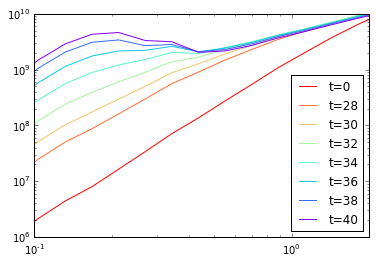

In [4]:
xi_range = np.logspace(-1.5,1.5,num=30)
tlst = [0,28,30,32,34,36,38,40]
hsv = plt.get_cmap('rainbow_r')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("2fast_sum_args_list{}_lev7.txt".format(s))
    plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
plt.xlim(0.1,2)
plt.ylim(1e6,1e10)
plt.legend(loc ="lower right")

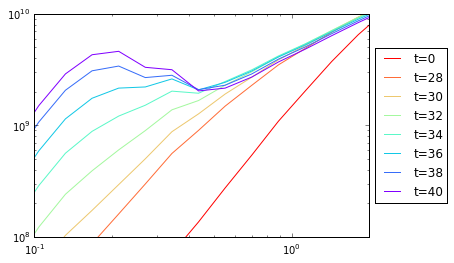

In [5]:
xi_range = np.logspace(-1.5,1.5,num=30)
tlst = [0,28,30,32,34,36,38,40]
hsv = plt.get_cmap('rainbow_r')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("2fast_sum_args_list{}_lev7.txt".format(s))
    plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
plt.xlim(0.1,2)
plt.ylim(1e8,1e10)
plt.legend(loc ="center left", bbox_to_anchor=(1, 0.5))

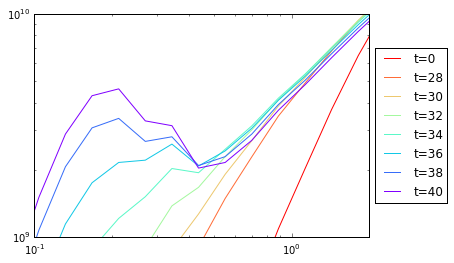

In [6]:
xi_range = np.logspace(-1.5,1.5,num=30)
tlst = [0,28,30,32,34,36,38,40]
hsv = plt.get_cmap('rainbow_r')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("2fast_sum_args_list{}_lev7.txt".format(s))
    plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
plt.xlim(0.1,2)
plt.ylim(1e9,1e10)
plt.legend(loc ="center left", bbox_to_anchor=(1, 0.5))

### Looks like the inflection happens at ~t = 31 which agreed with our low-resolution , no sink case (at ~t=30)

# Red = No Sink
# Blue = Sink
- both level 6~8, AMR refinement based on Jean's criterion
- plotted in cyan is the accretion radius of the sink
- plotted in magenta is the minimum cell size and the max box size (beyond these values might be bogus)

In [7]:
import mpld3

In [15]:
mpld3.disable_notebook()

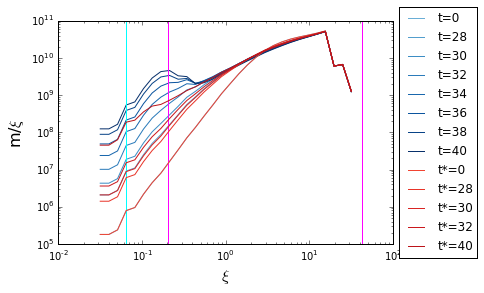

In [19]:
xi_range = np.logspace(-1.5,1.5,num=30)
tlst = [0,28,30,32,34,36,38,40]
hsv = plt.get_cmap('Blues')
colors = hsv(np.linspace(0.5, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
#     c="red"
    data = np.loadtxt("2fast_sum_args_list{}_lev7.txt".format(s))
    plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
    
min_cell_size =  1e19/2**(9)*1.057E-17
plt.axvline(min_cell_size,c="magenta")
plt.axvline(4e18*1.057E-17,c="magenta")
plt.axvline(6.103515625e+15*1.057E-17,c="cyan")

xi_range = np.logspace(-1.5,1.5,num=30)
tlst = [0,28,30,32,40]
hsv = plt.get_cmap('Reds')
colors = hsv(np.linspace(0.6,0.8, len(tlst)))
for s , c in zip(tlst,colors):
#     c="blue"
    data = np.loadtxt("../lev8sink/fast_sum_args_list{}_lev7.txt".format(s))
    plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t*={}".format(s), color=c)

plt.legend(loc ="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel(r"$\xi$",fontsize=16)
plt.ylabel(r"m/$\xi$",fontsize=16)



### Interactive version to zoom in to see the differences

In [12]:
mpld3.enable_notebook()

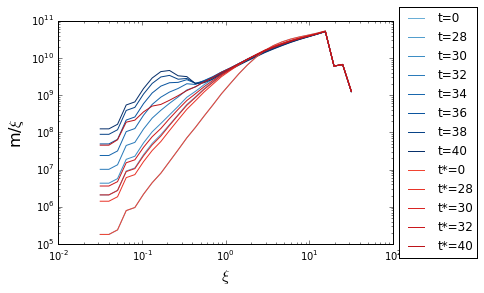

In [13]:
xi_range = np.logspace(-1.5,1.5,num=30)
tlst = [0,28,30,32,34,36,38,40]
hsv = plt.get_cmap('Blues')
colors = hsv(np.linspace(0.5, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
#     c="red"
    data = np.loadtxt("2fast_sum_args_list{}_lev7.txt".format(s))
    plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
    
# min_cell_size =  1e19/2**(9)*1.057E-17
# plt.axvline(min_cell_size,c="red")
# plt.axvline(4e18*1.057E-17,c="red")


xi_range = np.logspace(-1.5,1.5,num=30)
tlst = [0,28,30,32,40]
hsv = plt.get_cmap('Reds')
colors = hsv(np.linspace(0.6,0.8, len(tlst)))
for s , c in zip(tlst,colors):
#     c="blue"
    data = np.loadtxt("../lev8sink/fast_sum_args_list{}_lev7.txt".format(s))
    plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t*={}".format(s), color=c)

plt.legend(loc ="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel(r"$\xi$",fontsize=16)
plt.ylabel(r"m/$\xi$",fontsize=16)

# plt.title("Sink (Level 7)",fontsize=16)

At large radii, the results converge. At small radii, things differ, even before sink comes in at t = 34. 
No sink case crashes at t = 43. Sink case crashes at t = 50 .